# Pakistan's E-Commerce EDA

By Heba Masarwa

## Table Of Contents 
- [Introduction](#introduction)
    - [Data Source](#data-source)
- [Import Libraries and Load Dataset](#import-libraries-and-load-dataset)
- [Data Cleaning](#data-cleaning)
    - [Visualizing the Missing Values](#visualizing-the-missing-values)
    - [Removing the NULL Values](#removing-the-null-values)
- [Visualizations](#visualizations)
    - [Correlation For The Numerical Columns](#correlation-for-the-numerical-columns)
    - [How does the Price effect the discount amount?](#how-does-the-price-effect-the-discount-amount)
    - [How does the Price effect the Grand Total? & How does the Quantity Ordered effect the Grand Total?](#how-does-the-price-effect-the-grand-total--how-does-the-quantity-ordered-effect-the-grand-total)
    - [Order Status Distribution](#order-status-distribution)
    - [Payment Method Distribution](#payment-method-distribution)
    - [Category Distribution](#category-distribution)
    - [BI Status Distribution](#bi-status-distribution)
- [End Note](#end-note)

<a id="Introduction"></a>
## Introduction

This exploratory data analysis presents an examination of the evolving e-commerce landscape in Pakistan, focusing on consumer behavior, transaction patterns, and market trends from March 2016 to August 2018. Utilizing a comprehensive dataset, we aim to analyze and interpret the different aspects of e-commerce transactions, including purchasing trends, payment preferences, and category performance. 

<a id="Data-source"></a>
### Data Source

Pakistan's_E-Commerce_Dataset

- Geography: Pakistan

- Time period: 03/2016 – 08/2018

- Unit of analysis: E-Commerce Orders

- Dataset: The dataset contains detailed information of half a million e-commerce orders in Pakistan from March 2016 to August 2018. It contains item details, shipping method, payment method like credit card, Easy-Paisa, Jazz-Cash, cash-on-delivery, product categories like fashion, mobile, electronics, appliance etc., date of order, SKU, price, quantity, total and customer ID. This is the most detailed dataset about e-commerce in Pakistan that you can find in the Public domain.

- Variables: The dataset contains Item ID, Order Status (Completed, Cancelled, Refund), Date of Order, SKU, Price, Quantity, Grand Total, Category, Payment Method and Customer ID.

<a id="subtitle2"></a>
## Import Libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

Import the data

In [2]:
try:
    data = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')
except:
    print('Error while loading the file')
    
data.head()

C:\Users\hebam\AppData\Local\Temp\ipykernel_3940\4263524039.py:2: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [3]:
data.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Show data size

In [4]:
data.shape

(1048575, 26)

data columns

In [5]:
data.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

The MV column contains leading and trailing space, we will rename it for easier processing

In [6]:
data.rename(columns={' MV ': 'MV'}, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14  MV                     584524 non-

In [8]:
# the count and percentage of missing values
data.stb.missing(style=True)

,missing,total,percent
Unnamed: 25,"1,048,575","1,048,575",100.00%
Unnamed: 24,"1,048,575","1,048,575",100.00%
Unnamed: 23,"1,048,575","1,048,575",100.00%
Unnamed: 22,"1,048,575","1,048,575",100.00%
Unnamed: 21,"1,048,575","1,048,575",100.00%
sales_commission_code,"601,229","1,048,575",57.34%
category_name_1,"464,215","1,048,575",44.27%
sku,"464,071","1,048,575",44.26%
status,"464,066","1,048,575",44.26%
Customer ID,"464,062","1,048,575",44.26%


In [9]:
#  the count of duplicate rows
data.duplicated().sum()

464050

<a id="Data-Cleaning"></a>
## Data Cleaning 

<a id='subtitle3'></a>
### Visualizing the Missing Values

With the help of a heatmap, we can see the amount of data that is missing from all the columns.

<Axes: >

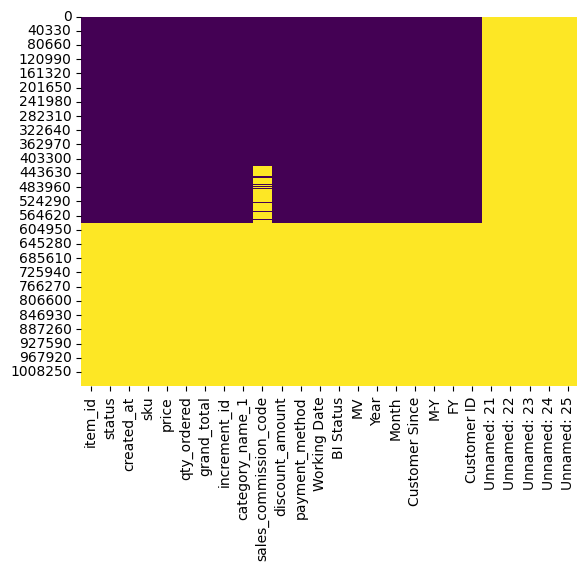

In [10]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')


We can see that the dataset has 25 columns, and a few of these columns are comprised entirely of NaN values. These columns: Unnamed: 21, Unnamed: 22, Unnamed: 23, Unnamed: 24, Unnamed: 25	will be removed.

And we can also see that many rows consist solely of NaN values and this is why we have such a high number of duplicated values, the most appropriate course of action is to remove all rows with NaN values.

We can also see a significant percentage of NaN values in the 'sales_commission_code', the best course of action is to remove this column, as the amount of null values makes it difficult to reach a valid analysis. Moreover, the dataset source provides no explanation of what each code represents, thus this data can't help us much in the analysis.

<a id='subtitle8'></a>

### Removing the NULL Values

Removing all the completely NULL columns, and 'sales_commission_code' due to a high percentage of NULL values.

In [11]:
data.drop(columns=[ 'Unnamed: 21', 
                   'Unnamed: 22', 
                   'Unnamed: 23',
                   'Unnamed: 24',
                   'Unnamed: 25',
                   'sales_commission_code'],  inplace=True)

Removing all the completely NULL rows

In [12]:
data.dropna(how='all', inplace=True)

<a id="Visualizations"></a>
## Visualizations

<a id="graph1"></a>
### Correlation For The Numerical Columns

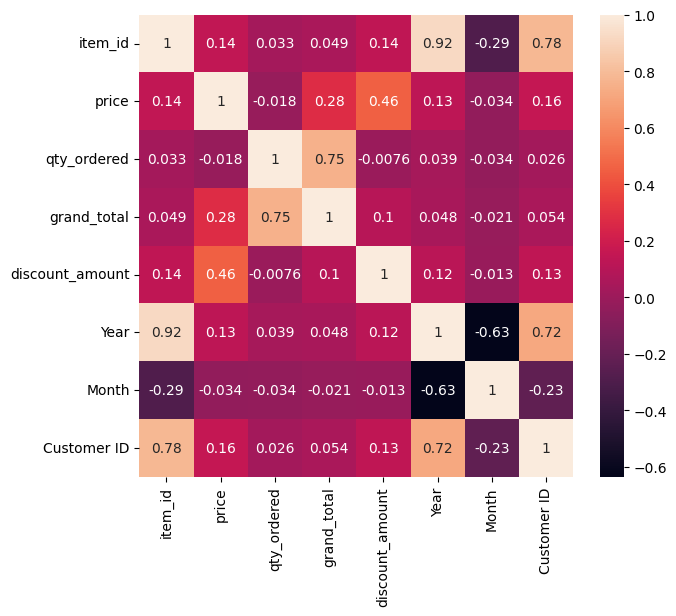

In [13]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Now, you can safely compute correlation and use seaborn's heatmap
plt.figure(figsize=(7,6))
sns.heatmap(numeric_data.corr(), cbar=True, annot=True)
plt.show()

Positive Correlation:
- price: grand_total, discount_amount
- qty_ordered: grand_total

There are no significant negative correlations.

As for the following columns—item_id, customer ID, year, month—given their nature, these correlations with each other are coincidental. They do not reflect meaningful or actionable relationships and, therefore, will not be pursued further in our analysis.

<a id="graph2"></a>

### How does the Price effect the discount amount?

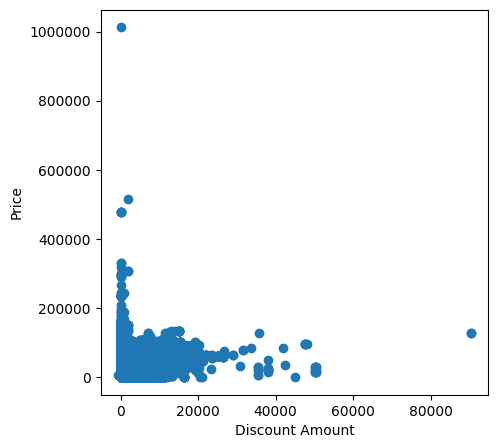

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(x='discount_amount',y='price',data=data)
plt.xlabel('Discount Amount')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')


We can see two linear relationships in the graph: for items with a high price (200,000-100,000), the discount amount is very small or 0; as for items with a relatively cheaper price (0-200,000), the discount increases as well.

Luxury items tend not to have sales due to their prestige and exclusivity; meanwhile, items that are cheaper to produce get discounts often due to the low cost of production. The gain in profits, even with a high discount, is usually worth it for these products, as it also drives up sales.

<a id="graph3"></a>

### How does the Price effect the Grand Total? & How does the Quantity Ordered effect the Grand Total?

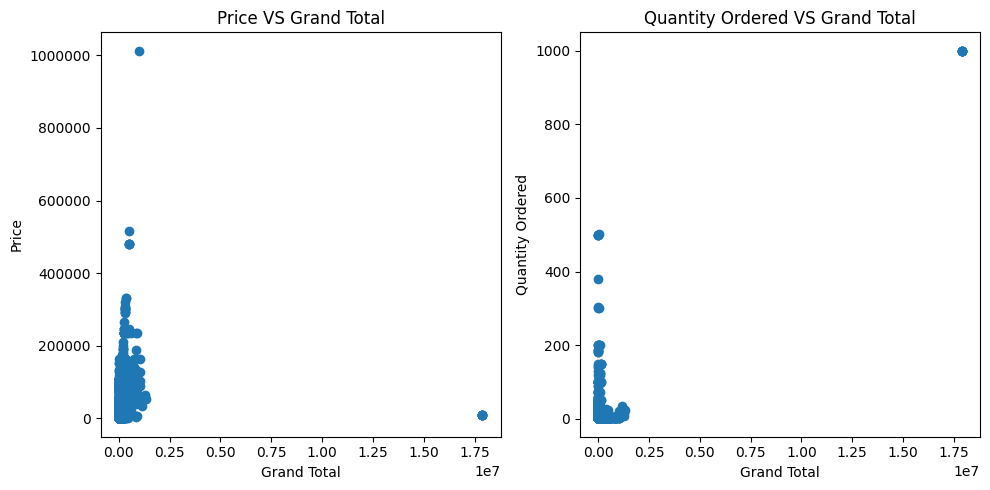

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plotting on the first subplot
ax[0].scatter(x='grand_total', y='price', data=data)
ax[0].set_xlabel('Grand Total')
ax[0].set_ylabel('Price')
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_title('Price VS Grand Total')

# Plotting on the second subplot
ax[1].scatter(x='grand_total', y='qty_ordered', data=data)
ax[1].set_xlabel('Grand Total')
ax[1].set_ylabel('Quantity Ordered')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_title('Quantity Ordered VS Grand Total')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

We observe an intuitive relationship between Price and Quantity Ordered with the grand total; as both price and quantity increase, the grand total rises accordingly. This trend aligns with expectations, given the grand total is calculated by multiplying price and quantity, highlighting a clear positive correlation between these factors.

<a id="graph4"></a>

### Order Status Distribution

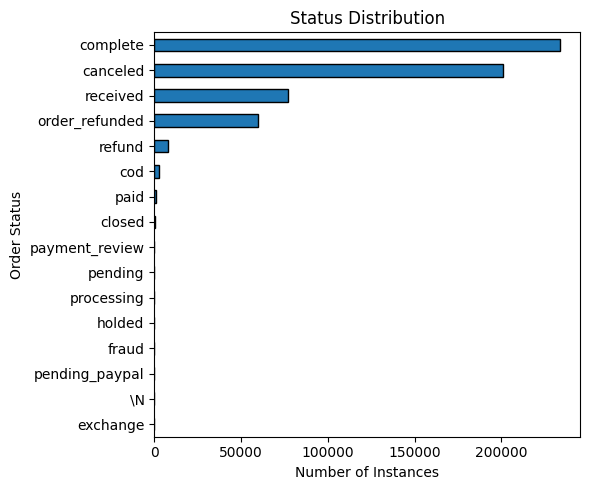

In [16]:
status_counts = data['status'].value_counts().sort_values(ascending= True)

# Creating a horozantal bar chart
plt.figure(figsize=(6, 5)) 
status_counts.plot(kind='barh', edgecolor='black')
plt.title('Status Distribution')
plt.ylabel('Order Status')
plt.xlabel('Number of Instances')
plt.tight_layout() 
plt.show()

Observing the distribution of order statuses, we note that the majority of orders are completed, while a significant portion is canceled. 

<a id="graph6"></a>

### Payment Method Distribution

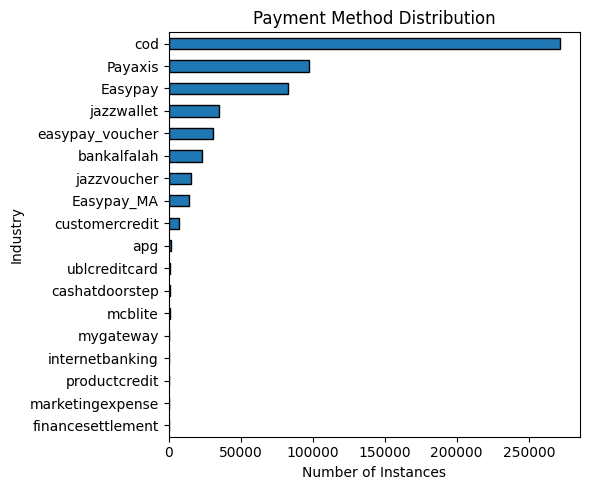

In [17]:
payment_method_counts = data['payment_method'].value_counts().sort_values(ascending= True)

# Creating a horozantal bar chart
plt.figure(figsize=(6, 5)) 
payment_method_counts.plot(kind='barh', edgecolor='black')
plt.title('Payment Method Distribution')
plt.ylabel('Industry')
plt.xlabel('Number of Instances')
plt.tight_layout() 
plt.show()


Note: COD stands for 'Cash On Delivery' 

The most popular payment method by a significant margin is Cash on Delivery (COD), with electronic methods trailing behind.

<a id="graph7"></a>

### Category Distribution

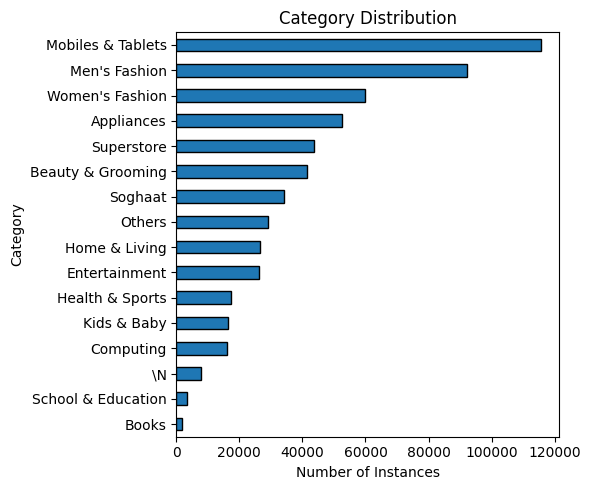

In [18]:
category_counts = data['category_name_1'].value_counts().sort_values(ascending= True)

# Creating a horozantal bar chart
plt.figure(figsize=(6, 5)) 
category_counts.plot(kind='barh', edgecolor='black')
plt.title('Category Distribution')
plt.ylabel('Category')
plt.xlabel('Number of Instances')
plt.tight_layout() 
plt.show()

The most popular category is Mobiles & Tablets, closely followed by Men's and Women's Fashion. Other notably large categories include Appliances and Superstores.

<a id="graph8"></a>

### BI Status Distribution

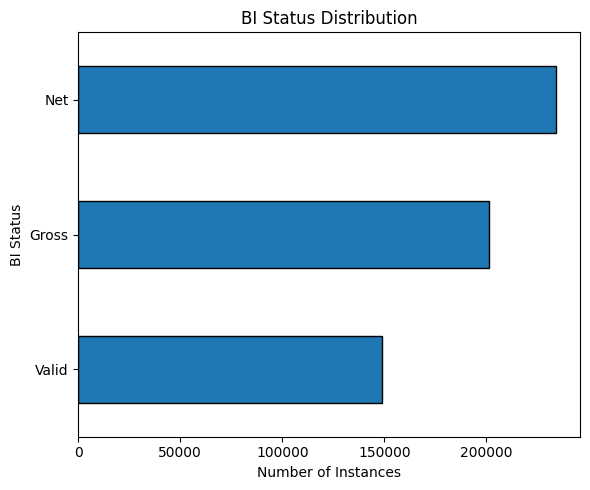

In [19]:
data = data.loc[data['BI Status'] != '#REF!']
bi_counts = data['BI Status'].value_counts().sort_values(ascending= True)

# Creating a horozantal bar chart
plt.figure(figsize=(6, 5)) 
bi_counts.plot(kind='barh', edgecolor='black')
plt.title('BI Status Distribution')
plt.ylabel('BI Status')
plt.xlabel('Number of Instances')
plt.tight_layout() 
plt.show()

Net: what remains from the whole after certain deductions are made. 

Gross: Typically signifies unadjusted data or values, before any deductions. 

Valid: This status could indicate that the data has passed certain quality checks or validations, making it reliable for analysis.

## End Note

For the analysis in Tableau, our focus will be on:
- Identifying the most profitable category and analyzing the impact of discounts on profitability.
- Examining sales trends over time and identifying peak sales periods across different categories.
- Exploring the relationship between order status, payment methods, BI status, and categories.

for excel file:

In [ ]:
with pd.ExcelWriter('data.xlsx', engine='xlsxwriter') as writer:
    data.to_excel(writer, sheet_name='cleaned_data')

for csv file:

In [21]:
data.to_csv('cleaned_data.csv', index=False)